In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sea

In [2]:
lista_LSTMIMC = []
listaLM = [1,3,5,7,10,12,14,18,21]
for i in listaLM:
    cadena = "LSTMIMC/Dataframes/lstmH" + str(i) + "IMC.csv"
    df = pd.read_csv(cadena)
    lista_LSTMIMC.append(df)

In [3]:
lista_LSTM = []
listaLM = [1,3,5,7,10,12,14,18,21]
for i in listaLM:
    cadena = "LSTMWIMC/Dataframes/lstmH" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_LSTM.append(df)

In [4]:
RandomForest = pd.read_csv("RandomForest/resultados_randomForestNOIMC.csv")

In [5]:
RandomForestIMC = pd.read_csv("RandomForestIMC/resultados_randomForest.csv")

In [6]:
lista_redes = []
listar = [1,3,5,7,10,12,14,18,21]
for i in listar:
    cadena = "RedesNeuronales/Dataframes/desnsasH" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_redes.append(df)

In [7]:
lista_redesIMC = []
listar = [1,3,5,7,10,12,14,18,21]
for i in listar:
    cadena = "RedesNeuronalesIMC/Dataframes/desnsasH" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_redesIMC.append(df)

In [8]:
lista_XGBoostIMC = []
listaXGB = [1,2,3,4,5,6,7,8,9,10,14,18,20,30,40,50,75,100]
for i in listaXGB:
    cadena = "XGBIMC/resultados_xgboost_h" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_XGBoostIMC.append(df)

In [9]:
lista_XGBoost = []
listaXGB = [1,2,3,4,5,6,7,8,9,10,14,18,20,30,40,50,75,100]
for i in listaXGB:
    cadena = "XGBWIMC/resultados_xgboostNOIMC_h" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_XGBoost.append(df)

In [11]:
lista_regresion = []
lista_regresion.append(pd.read_csv("RegresionSimbolica/Dataframes/resultados_regresionSimbolica_it7000f.csv"))
lista_regresion.append(pd.read_csv("RegresionSimbolica/Dataframes/resultados_regresionSimbolicaC_it7000f.csv"))
lista_regresion.append(pd.read_csv("RegresionSimbolica/Dataframes/resultados_regresionSimbolicaCIMC_it7000f.csv"))
lista_regresion.append(pd.read_csv("RegresionSimbolica/Dataframes/resultados_regresionSimbolicaIMC_it7000f.csv"))

In [12]:
resultados = []
for i, df in zip(listaXGB, lista_XGBoost):
    minimo = df["valor"].min()
    resultados.append((i, minimo))
df_resultadosXGBoost = pd.DataFrame(resultados, columns=["H", "min_value"])
df_resultadosXGBoost.to_csv("RendimientosXGBoost.csv", index=False)

In [13]:
resultados = []
for i, df in zip(listaXGB, lista_XGBoostIMC):
    minimo = df["valor"].min()
    resultados.append((i, minimo))
df_resultadosXGBoostIMC = pd.DataFrame(resultados, columns=["H", "min_value"])
df_resultadosXGBoostIMC.to_csv("RendimientosXGBoostIMC.csv", index=False)

In [14]:
resultados = []
for i, df in zip(listar, lista_redes):
    minimo = df["value"].min()
    resultados.append((i, minimo))
df_resultadosRedes = pd.DataFrame(resultados, columns=["H", "min_value"])
df_resultadosRedes.to_csv("RendimientosRedesNeuronales.csv", index=False)

In [15]:
df_resultadosRandomForest = RandomForest.groupby("numhoras", as_index=False)["valor"].min()
df_resultadosRandomForest.columns = ["H", "min_value"]
df_resultadosRandomForest.to_csv("RendimientosRandomForest.csv", index=False)

In [16]:
df_resultadosRandomForestIMC = RandomForestIMC.groupby("numhoras", as_index=False)["valor"].min()
df_resultadosRandomForestIMC.columns = ["H", "min_value"]
df_resultadosRandomForestIMC.to_csv("RendimientosRandomForestIMC.csv", index=False)

In [17]:
resultados = []
for i, df in zip(listaLM, lista_LSTM):
    minimo = df["value"].min()
    resultados.append((i, minimo))
df_resultadosLSTM = pd.DataFrame(resultados, columns=["H", "min_value"])
df_resultadosLSTM.to_csv("RendimientosLSTM.csv", index=False)

In [18]:
resultados = []
for i, df in zip(listaLM, lista_LSTMIMC):
    minimo = df["value"].min()
    resultados.append((i, minimo))
df_resultadosLSTMIMC = pd.DataFrame(resultados, columns=["H", "min_value"])
df_resultadosLSTMIMC.to_csv("RendimientosLSTMIMC.csv", index=False)

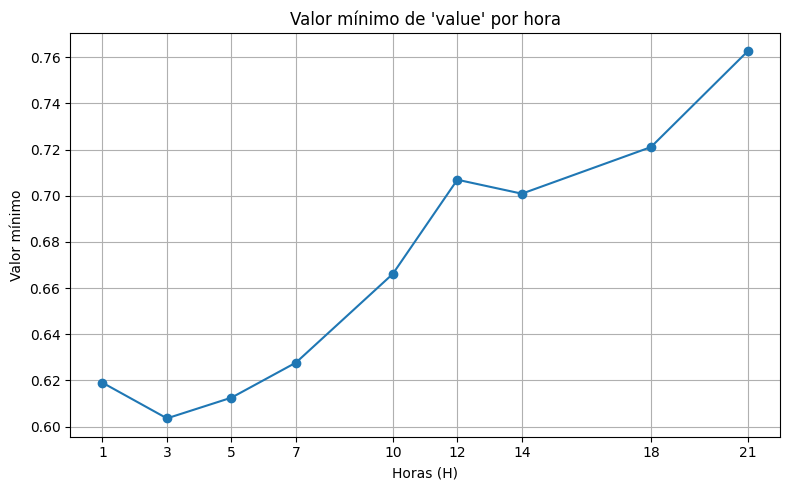

In [19]:
import matplotlib.pyplot as plt

# Usamos los datos ya cargados en df_resultados
plt.figure(figsize=(8, 5))
plt.plot(df_resultadosRedes["H"], df_resultadosRedes["min_value"], marker='o', linestyle='-')
plt.title("Valor mínimo de 'value' por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
plt.xticks(df_resultadosRedes["H"])  # Asegura que se muestren todos los puntos
plt.tight_layout()
#plt.savefig("grafico_minimos.png")  # Guarda la gráfica si quieres
plt.show()


In [20]:
resultados = []
for i, df in zip(listar, lista_redesIMC):
    minimo = df["value"].min()
    resultados.append((i, minimo))
df_resultadosRedesIMC = pd.DataFrame(resultados, columns=["H", "min_value"])
df_resultadosRedesIMC.to_csv("RendimientosRedesNeuronalesIMC.csv", index=False)

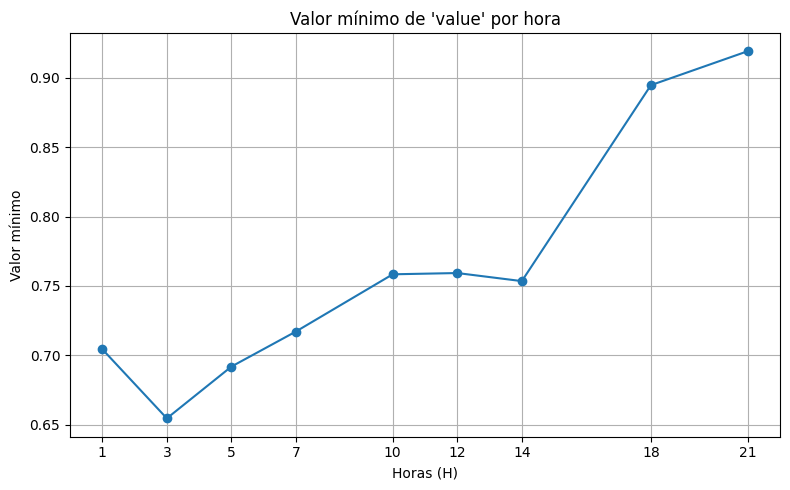

In [21]:
# Usamos los datos ya cargados en df_resultados
plt.figure(figsize=(8, 5))
plt.plot(df_resultadosRedesIMC["H"], df_resultadosRedesIMC["min_value"], marker='o', linestyle='-')
plt.title("Valor mínimo de 'value' por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
plt.xticks(df_resultadosRedesIMC["H"])  # Asegura que se muestren todos los puntos
plt.tight_layout()
#plt.savefig("grafico_minimos.png")  # Guarda la gráfica si quieres
plt.show()

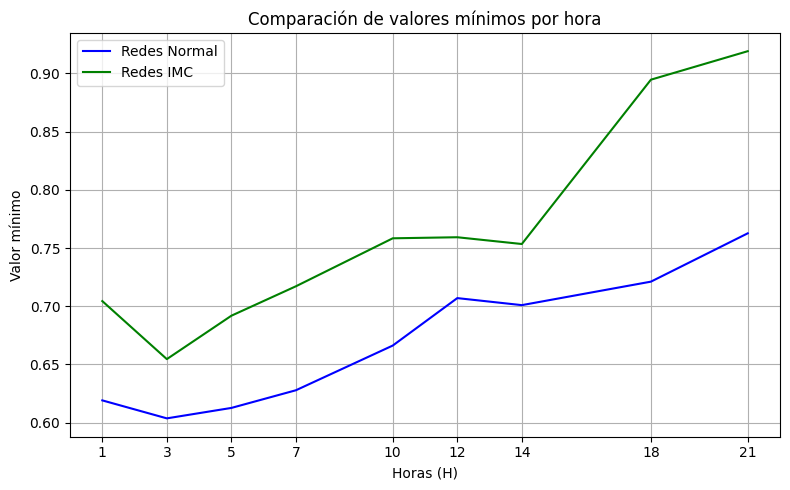

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Graficar Normal
plt.plot(df_resultadosRedes["H"], df_resultadosRedes["min_value"], color='blue', label='Redes Normal')

# Graficar IMC
plt.plot(df_resultadosRedesIMC["H"], df_resultadosRedesIMC["min_value"], color='green', label='Redes IMC')

plt.title("Comparación de valores mínimos por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
plt.xticks(df_resultadosRedes["H"])  # Asume que ambos tienen los mismos H
plt.legend()
plt.tight_layout()
plt.savefig("comparacion_minimos.png")  # Opcional
plt.show()


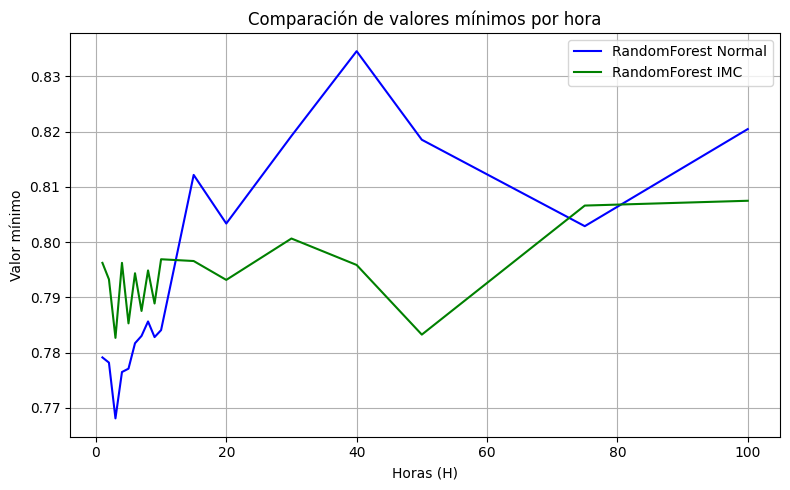

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Graficar Normal
plt.plot(df_resultadosRandomForest["H"], df_resultadosRandomForest["min_value"], color='blue', label='RandomForest Normal')

# Graficar IMC
plt.plot(df_resultadosRandomForestIMC["H"], df_resultadosRandomForestIMC["min_value"], color='green', label='RandomForest IMC')

plt.title("Comparación de valores mínimos por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
#plt.xticks(df_resultadosRandomForest["H"])  # Asume que ambos tienen los mismos H
plt.legend()
plt.tight_layout()
plt.savefig("comparacion_minimos.png")  # Opcional
plt.show()

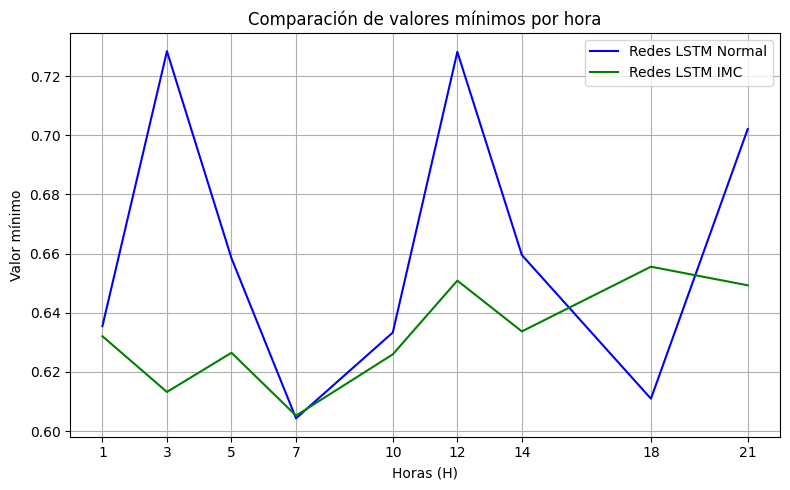

In [24]:
plt.figure(figsize=(8, 5))

# Graficar Normal
plt.plot(df_resultadosLSTM["H"], df_resultadosLSTM["min_value"], color='blue', label='Redes LSTM Normal')

# Graficar IMC
plt.plot(df_resultadosLSTMIMC["H"], df_resultadosLSTMIMC["min_value"], color='green', label='Redes LSTM IMC')

plt.title("Comparación de valores mínimos por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
plt.xticks(df_resultadosLSTMIMC["H"])  # Asume que ambos tienen los mismos H
plt.legend()
plt.tight_layout()
plt.savefig("comparacion_minimos.png")  # Opcional
plt.show()

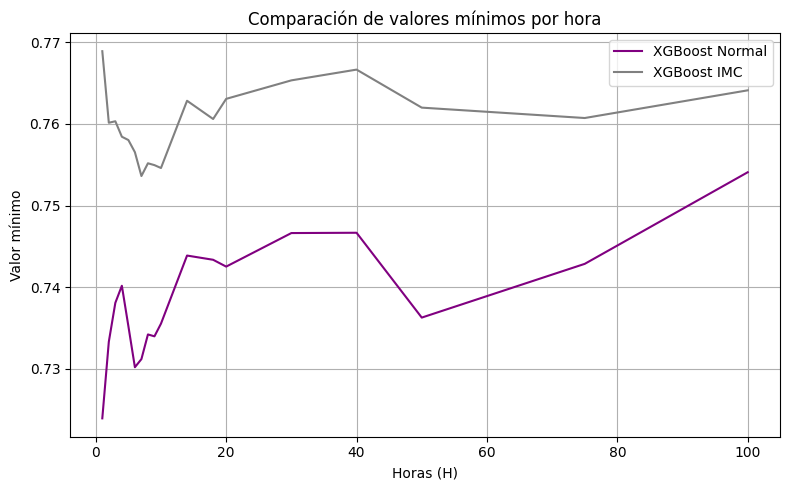

In [25]:
plt.figure(figsize=(8, 5))

plt.plot(df_resultadosXGBoost["H"], df_resultadosXGBoost["min_value"], color='purple', label='XGBoost Normal')

plt.plot(df_resultadosXGBoostIMC["H"], df_resultadosXGBoostIMC["min_value"], color='gray', label='XGBoost IMC')

plt.title("Comparación de valores mínimos por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
#plt.xticks(df_resultadosRedes["H"])  # Asume que ambos tienen los mismos H
plt.legend()
plt.tight_layout()
plt.savefig("comparacion_minimos.png")  # Opcional
plt.show()

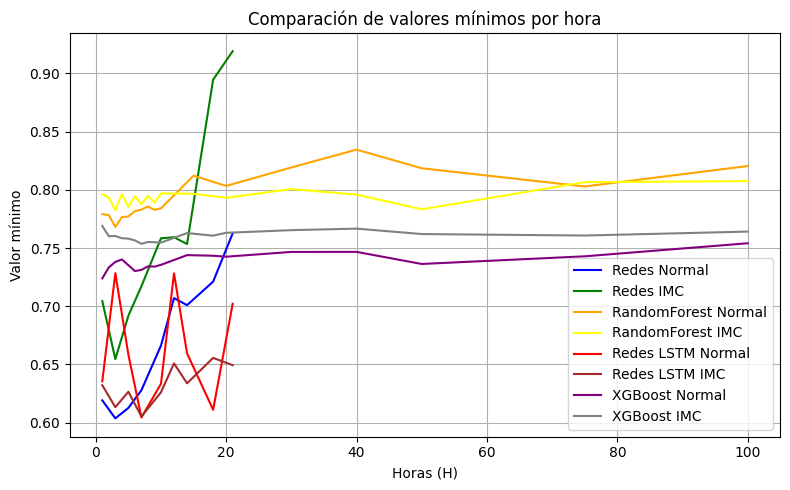

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Graficar Normal
plt.plot(df_resultadosRedes["H"], df_resultadosRedes["min_value"], color='blue', label='Redes Normal')

# Graficar IMC
plt.plot(df_resultadosRedesIMC["H"], df_resultadosRedesIMC["min_value"], color='green', label='Redes IMC')

plt.plot(df_resultadosRandomForest["H"], df_resultadosRandomForest["min_value"], color='orange', label='RandomForest Normal')

plt.plot(df_resultadosRandomForestIMC["H"], df_resultadosRandomForestIMC["min_value"], color='yellow', label='RandomForest IMC')

plt.plot(df_resultadosLSTM["H"], df_resultadosLSTM["min_value"], color='red', label='Redes LSTM Normal')

plt.plot(df_resultadosLSTMIMC["H"], df_resultadosLSTMIMC["min_value"], color='brown', label='Redes LSTM IMC')

plt.plot(df_resultadosXGBoost["H"], df_resultadosXGBoost["min_value"], color='purple', label='XGBoost Normal')

plt.plot(df_resultadosXGBoostIMC["H"], df_resultadosXGBoostIMC["min_value"], color='gray', label='XGBoost IMC')

plt.title("Comparación de valores mínimos por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
#plt.xticks(df_resultadosRedes["H"])  # Asume que ambos tienen los mismos H
plt.legend()
plt.tight_layout()
plt.savefig("comparacion_minimos.png")  # Opcional
plt.show()


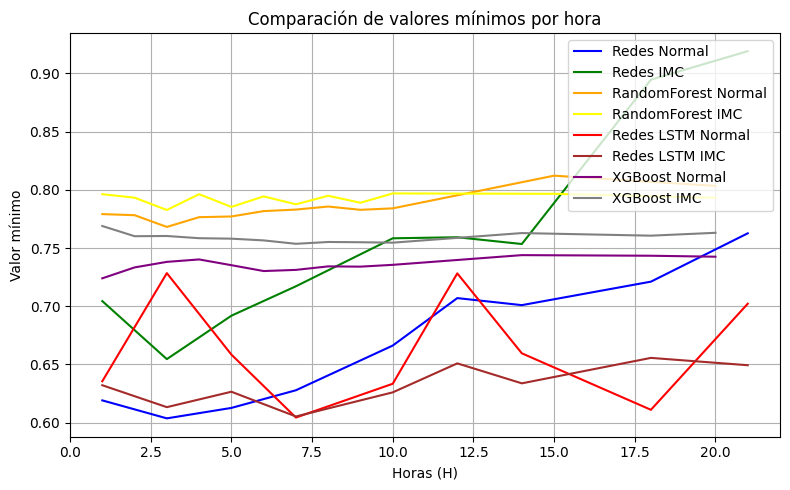

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Filtrar solo hasta hora 21
df1 = df_resultadosRedes[df_resultadosRedes["H"] <= 21]
df2 = df_resultadosRedesIMC[df_resultadosRedesIMC["H"] <= 21]
df3 = df_resultadosRandomForest[df_resultadosRandomForest["H"] <= 21]
df4 = df_resultadosRandomForestIMC[df_resultadosRandomForestIMC["H"] <= 21]
df5 = df_resultadosLSTM[df_resultadosLSTM["H"] <= 21]
df6 = df_resultadosLSTMIMC[df_resultadosLSTMIMC["H"] <= 21]
df7 = df_resultadosXGBoost[df_resultadosXGBoost["H"] <= 21]
df8 = df_resultadosXGBoostIMC[df_resultadosXGBoostIMC["H"] <= 21]

# Graficar cada uno (sin mejoras)
plt.plot(df1["H"], df1["min_value"], color='blue', label='Redes Normal')
plt.plot(df2["H"], df2["min_value"], color='green', label='Redes IMC')
plt.plot(df3["H"], df3["min_value"], color='orange', label='RandomForest Normal')
plt.plot(df4["H"], df4["min_value"], color='yellow', label='RandomForest IMC')
plt.plot(df5["H"], df5["min_value"], color='red', label='Redes LSTM Normal')
plt.plot(df6["H"], df6["min_value"], color='brown', label='Redes LSTM IMC')
plt.plot(df7["H"], df7["min_value"], color='purple', label='XGBoost Normal')
plt.plot(df8["H"], df8["min_value"], color='gray', label='XGBoost IMC')

plt.title("Comparación de valores mínimos por hora")
plt.xlabel("Horas (H)")
plt.ylabel("Valor mínimo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
